## Тематическое (Topic) моделирование

Можно группировать текстовые документы с применением __методов кластеризации__. Это средство весьма полезное, но не всегда наилучшее. Оно приводит к тому, что каждый текст попадает в один и только один кластер. Но, допустим есть книга посвященная машинному обучению и языку Python. Куда ее отнести - к работам по теме "Python", или по теме "машинное обучение". В реальном книжном магазине книгу нужно поместить на какую-то одну полку. Но в Интернет-магазине она должна присутствовать в обеих рубриках. Но это не значит, что ее следует включать во все вообще рубрики, скажем, в раздел, посвященный кулинарии.

В этой главе мы познакомимся с методами, которые позволяют относить каждый документ к нескольким __темам (topics)__, а не помещать в одинединственный кластер. __Темы будут определяться автоматически__ по имеющемуся набору документов. __Документами могут быть__ как книги, так и более короткие тексты, например, сообщенне в блоге, новость или электронное письмо.

Хотелось бы уметь __определять центральную (central) и второстепенные (referring to other topics) темы документа__. 

Отрасль машинного обучения, в которой рассматриваются подобные проблемы и которой посвящена эта глава, называется __тематическим моделированием (topic modeling)__.

## Латентное размещение Дирихле (latent Dirichlet allocation LDA)

Так получилось, что в машинном обучении есть два метода с аббревиатурой __LDA__: 
1. __Латентное размещение Дирихле (latent Dirichlet allocation)__, один из алгоритмов тематического моделирования, 
2. __Линейный дискриминантный анализ (linear discriminant analysis)__ - алгоритм классификации. 

Кроме аббревиатуры, у них нет ничего общего, и иногда это приводит к недоразумениям. В модуле scikit-learn
есть подмодуль __sklearn.lda__, в котором реализован линейный дискриминантный анализ. В настоящее время __метод латентного размещеиия Дирихле в scikit-learn не реализован__

Математические идеи, лежащие в основе метода латентного размещения Дирихле, довольно сложны. Однако можно составить общее представление о LDA на интуитивном уровне. LDA принадлежит к классу так называемых __порождающих моделей (generative models)__, поскольку они сопровождаются пояснением, описывающим, как были сгенерированы данные. Разумеется, это пояснение - всего лишь приближение к реальности, призванное упростить машинное обучение. 

В LDA мы сначала создаем темы, назначая словам __веса в форме вероятностей (probability weights)__. В каждой теме одному и тому же слову назначены разные веса. Так, в теме "Python" у слова "variable" (переменная) будет высокая вероятность, а у слова "inebriated" (подвыпивший) - низкая. Желая сгенерировать новый документ, мы сначала
выбираем соответствующие ему темы, а затем комбинируем слова, относящиеся к этим темам.

Пусть, например, в книгах обсуждаются всего три темы:
* машинное обучение;
* язык Python;
* кулинария.

__С каждой темой ассоциирован список слов__. В одной книге будут встречаться слова из первых двух тем, положим, в пропорции 50/50. Доли необязательно должны быть одинаковыми, возможно и соотношение 70/30. Порождая новый текст, мы
выбираем слово за словом. Сначала решаем, из какой темы брать слово; решение принимается случайно, но в соответствии с весами тем. Определившись с темой, мы выбираем слово нз списка английских слов, ассоциированных с этой темой.

В этой модели порядок слов не играет роли. То есть это __модель набора слов (bag of words)__. Это очень грубое приближение к реалыюму языку, но часто оно оказывается достаточным, потому что одно лишь знание частот слов, встречающихся в документе, позволяет принимать, решения в алгоритмах машинного обучения.

На практике темы нам заранее неизвестны. Наша задача - __получить набор текстов и восстановить по нему пояснение (reverse engineer this fable)__, то есть выяснить, какие темы вообще представлены и к каким из них относится каждый документ.

## Построение тематической модели

К сожалению, scikit-learn не поддерживает метод латентного размещения Дирихле. Поэтому мы воспользуемся написанным на Python пакетом __gensim__. Этот пакет разработан __Радимом Ржехоржеком__ - исследователем в области машинного обучения и консультантом из Великобритании.

In [1]:
!pip install gensim

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim import corpora, models

В качестве данных мы возьмем собрание новостей агентства __Associated Press (АР)__. Это стандартный набор данных для исследований по машинному обучению, который использовался в некоторых ранних работах по тематическому моделированию. Скачав данные, загрузим их в память:

In [3]:
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt')

В переменной __corpus__ хранятся все текстовые документы в формате, удобном для обработки. Теперь мы можем построить на основе этого объекта __тематическую модель__:

In [4]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word)

В результате этого вызова конструктора будет статистически сделан вывод, какие темы присутствуют в корпусе. Получившуюся молель можно исследовать с разных точек зрения. Можно с помощью конструкции __model[doc]__ вывести список
тем, ассоциированных с документом:

In [5]:
doc = corpus.docbyoffset(0)
topics = model[doc]
topics

[(2, 0.042080634668475933),
 (3, 0.19344071954097458),
 (14, 0.047543847381963593),
 (28, 0.10687944778272351),
 (29, 0.30615464540751264),
 (43, 0.010506012251037278),
 (61, 0.078290651097378178),
 (69, 0.026758224717463971),
 (74, 0.010275350171067609),
 (77, 0.041766519320765735),
 (82, 0.057323252256790871),
 (99, 0.040403952020450752)]

__В обучающем алгоритме используются случайные величины__, поэтому при многократном обучении тематической модели на одних и тех же данных всякий раз получается новый результат. Но если данные ведут себя хорошо, то __некоторые качественные свойства модели будут неизменны__. Например, если использовать темы для сравнения документов, что мы и делаем, то сходство (similarities) будет устойчивым (robust), слабо изменяющимся свойством (change only slightly). C другой стороны, порядок тем будет совершенно различным

Результат выдается в виде списка пар __(topic_index, topic_weight)__. Мы видим, что с каждым документом ассоциирована лишь часть всех тем (в примере выше для некоторых тем вес не указан, то есть равен нулю). __Тематическая модель разрежена__, то есть всего тем много, но каждый отдельный документ принадлежит лишь немногим. Строго говоря, это не совсем так, поскольку __в модели LDA y любой темы ненулевая вероятность__, но для некоторых она настолько мала, что можно считать ее равной нулю, не жертвуя качеством аппроксимации.

__Вектор или матрица называют разреженными__, если большая часть элементов равна нулю (или настолько мала, что можно без ущерба для точности решения считать их нулевыми). Поэтому релевантны лишь немногие значения.

Часто задачу, кажущуюся неподъемно большой, удается решить, потому что данные разрежены. Например, любая веб-страница теоретически может ссылаться на любую друrую, но на практике граф ссылок очень сильно разрежен, потому что имеются ссылки лишь на небольшое число страниц.

Можно продолжить исследование и построить гистограмму тем, ассоциированных с документом:

In [6]:
num_topics_used = [len(model[doc]) for doc in corpus]

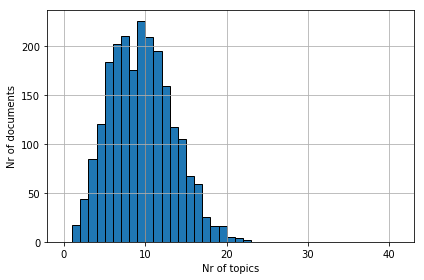

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42), edgecolor='k')
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
ax.grid()

fig.tight_layout()
plt.show()

Из графика видно, что примерно 150 документов относятся к 7 темам, а с большинством ассоциировано от 10 до 13 тем. Нет
ни одного документа, в котором бы шла речь более чем о 20 разных темах.

Это в значительной степени связано с выбором параметра __alpha__. Его точный смысл выражается в очень абстрактных терминах, но __чем больше значение alpha__, тем больше тем будет у каждого документа. Параметр alpha должен быть больше нуля, и обычно берется значение меньше 1. __Чем меньше alpha__, тем меньше ожидаемое количество тем документа. По умолчанию в gensim alpha принимается равным __1/num_topics__, но можно задать значение явно, передав конструктору
LdaModel одноименный параметр:

In [8]:
model1 = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1)
num_topics_used1 = [len(model1[doc]) for doc in corpus]

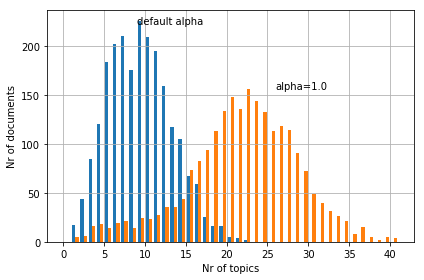

In [9]:
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

# Координаты ниже были получены методом проб и ошибок,
# чтобы хорошо смотреться
ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
ax.grid()

fig.tight_layout()
plt.show()

Это значение alpha больше подразумеваемого по умолчанию, поэтому у каждого документа должно быть больше тем. На комбинированной гистограмме видно, что gensim ведет себя в соответствии с ожиданиями - с каждым документом теперь ассоциировано больше тем. Сейчас для многих документов __количество тем варьируется от 20 до 25__. Если уменьшить значение, то будет наблюдаться противоположная тенденция.

Что это за темы? Технически это __мультиномиальное распределение (multinomial distributions) по словам__, то есть каждому слову из словаря назначается вероятность относительно некоторой темы. Чем выше вероятность, тем больше шансов, что слово связано с данной темой.

Наш мозг плохо приспособлен для рассуждений о распределениях вероятности, но список слов мы воспринимаем легко. Поэтому обычно темы описываются списком слов с наибольшими вероятностями. 

In [10]:
for ti in range(model.num_topics):
    words = model.show_topic(ti, 64)
    tf = sum(f for w, f in words)

    with open('./data/topics.txt', 'w') as output:
        output.write('\n'.join('{0} : {1}'.format(w, int(1000. * f / tf)) for w, f in words))
        output.write("\n\n\n")

В таблице перечислены первые десять тем из файла __topics.txt__:

<img src = "./img/first-ten-topics.jpg" width=700>

На первый взгляд, полная неразбериха, но, вчитавшись в список слов, мы начинаем понимать, что темы - не просто произвольно выхваченные слова, а __образуют логические группы__. Мы также видим, что темы относятся к старым новостям - к тому времени, когда еще существовал Советский Союз, а Горбачев был Генеральным секретарем.

Темы можно представить также __в виде облака слов__, в котором слова с большей вероятностью набраны более крупным шрифтом.
Вот, например, как выглядит тема, относящаяся к политике на Ближнем Востоке:

In [11]:
from gensim import matutils
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)

# Сначала определяем наиболее обсуждаемые темы, 
# т.е. с наибольшим общим весом
weight = topics.sum(1)
max_topic = weight.argmax()

In [12]:
!pip install pytagcloud
!pip install pygame
!pip install simplejson

In [13]:
from pytagcloud import create_tag_image, make_tags

def create_cloud(oname, words,maxsize=120, fontname='Lobster'):
    '''Создание облака слов (word cloud) (если pytagcloud установлен)

    Parameters
    ----------
    oname : имя выходного файла
    words : список (value,str)
    maxsize : int, optional
        Размер maximum word. Оптимальная настройка этого параметра часто
        требует некоторой ручной настройки для каждого input.
    fontname : str, optional
        используемый шрифт
    '''

    # gensim возвращает вес между 0 и 1 для каждого слова, в то время как pytagcloud
    # ожидает integer word count. Поэтому, мы перемножаем large number и округляем
    # Для визуализации это достаточное приближение.
    # Нам также необходимо перевернуть порядок т.к. gensim возвращает (value, word), whilst
    # тогда как pytagcloud требует (word, value):
    words = [(w,int(v*10000)) for w,v in words]
    tags = make_tags(words, maxsize=maxsize)
    create_tag_image(tags, oname, size=(1800, 1200), fontname=fontname)

In [14]:
# Получаем верхние 64 слова по этой теме
# Без аргумента show_topic будет возвращать 10 слов
words = model.show_topic(max_topic, 64)
create_cloud("./img/cloud_blei_lda.png", words)

<img src = "./img/cloud_blei_lda.png" width=500>

Видно также, что некоторые слова имело бы смысл удалить (например, слово "i" ), потому что они малоинформативны - являются стоп-словами. __При построении тематической модели полезно__ отфильтровывать стоп-слова, иначе могут появиться темы, целиком составленные из таких слов. Кроме того, желательно произвести предварительную обработку - стемминг для нормализации форм множественного числа и глагольных форм.

## Сравнение документов по темам

Темы могут быть полезны сами по себе для построения своего рода виньеток (vignettes) из слов, как на рисунке выше. Такие наглядные представления можно использовать для навигации по большим наборам документов. Например, на сайте разные темы можно показать в виде разных облаков слов, позволяющих пользователю с помощью нескольких щелчков мышью добраться до документов. На самом деле, именно такая методика реально применялась для анализа больших наборов документов.

Однако чаще __темы служат промежуточным средством__ для достижения другой цели. Теперь, когда у нас для каждого документа имеется оценка соотнесенности его с разными темам и мы можем сравнивать документы в пространстве тем. Это означает, что __мы сравниваем документы не по отдельным словам, а по тому, насколько близки затрагиваемые в них темы__.

И это очень эффективный подход, потому что два текстовых документа, почти не имеющие общих слов могут, тем не менее, относиться к одной и той же теме! Возможно, в них просто используются разные словесные конструкции (скажем, в одном документе говорится о "президенте США", а в другом - о "Бараке Обаме").

Можно искать сообщение, больше всего похожее на заданное в вопросе, исходя из сходства по темам. Если раньше при сравнении двух документов мы использовали их векторы слов, то теперь __сравним векторы тем.__

Для этого спроецируем документы в пространство тем. Иначе говоря, мы хотим __построить вектор тем, описывающий документ (задача понижения размерности)__. Вычислив для каждого документа вектор тем, мы сможем производить, над этими векторами различные операции, забыв об исходных словах. __Если темы значимы, то они потенциально могут оказаться более информатнвными, чем сами слова__. Кроме того, так можно и __сэкономить на вычислениях__, потому что сравнить векторы
с вероятностями сотни тем гораздо быстрее, чем векторы, размер которых сравним с размером словаря (тысячи термов).

In [15]:
import nltk.corpus
import nltk.stem

from scipy.spatial import distance
import numpy as np
from gensim import corpora, models
import sklearn.datasets

from collections import defaultdict

english_stemmer = nltk.stem.SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords.update(['from:', 'subject:', 'writes:', 'writes'])

class DirectText(corpora.textcorpus.TextCorpus):

    def get_texts(self):
        return self.input

    def __len__(self):
        return len(self.input)

In [16]:
try:
    dataset = sklearn.datasets.load_mlcomp("20news-18828", "train", mlcomp_root='./data')
except:
    print("Newsgroup data not found.")
    print("Please download from http://mlcomp.org/datasets/379")
    print("And expand the zip into the subdirectory data/")
    print("\n" * 2)
    raise

In [17]:
otexts = dataset.data
texts = dataset.data

texts = [t.decode('utf-8', 'ignore') for t in texts]
texts = [t.split() for t in texts]
texts = [map(lambda w: w.lower(), t) for t in texts]
texts = [filter(lambda s: not len(set("+-.?!()>@012345689") & set(s)), t) for t in texts]
texts = [filter(lambda s: (len(s) > 3) and (s not in stopwords), t) for t in texts]
texts = [map(english_stemmer.stem, t) for t in texts]

usage = defaultdict(int)
for t in texts:
    for w in set(t):
        usage[w] += 1

limit = len(texts) / 10
too_common = [w for w in usage if usage[w] > limit]
too_common = set(too_common)
texts = [filter(lambda s: s not in too_common, t) for t in texts]

In [18]:
corpus = DirectText(texts)
dictionary = corpus.dictionary
try:
    dictionary['computer']
except:
    pass

model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=dictionary.id2token)

Мы видели, как с помощью пакета gensim вычислить темы всех документов из корпуса. Сделаем это, сохраним результаты в массивах NumPy и вычислим попарные расстояния:

In [19]:
from gensim import matutils
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)

thetas = np.zeros((len(texts), 100))
for i, c in enumerate(corpus):
    for ti, v in model[c]:
        thetas[i, ti] += v

Переменная __topics__: содержит матрицу тем. Для вычисления попарных расстояний можно воспользоваться функцией __pdist__ из библиотеки SciPy. Один ее вызов вычисляет все значения sum((topics[ti] - topics[tj])\**2):

In [20]:
from scipy.spatial import distance
pairwise = distance.squareform(distance.pdist(topics))
distances = distance.squareform(distance.pdist(thetas))

Далее применим еще один трюк; присвоим диагональным элементам матрицы __distance__ некое большое значение (оно должно быть больше всех остальных элементов матрицы):

In [21]:
largest = pairwise.max()
for ti in range (len (topics)):
    pairwise[ti,ti] = largest + 1
    
large = distances.max() + 1
for i in range(len(distances)):
    distances[i, i] = large

Отметим, что это решение не сработало бы, если бы мы не присвоили диагональным элементам большое значение: функция всегда возвращала бы сам документ, потому что он больше всего похож на себя самого (за исключением маловероятного случая, когда у двух элементов в точности одинаковое распределение вероятностей тем, что практически невозможно, если только они не совпадают буквально).

Вот и всё! Для каждого документа можно легко найти ближайший к нему (получился вариант классификатора по ближайшему
соседу):

In [22]:
print(otexts[1])

From: geb@cs.pitt.edu (Gordon Banks)
Subject: Re: request for information on "essential tremor" and Indrol?

In article <1q1tbnINNnfn@life.ai.mit.edu> sundar@ai.mit.edu writes:

Essential tremor is a progressive hereditary tremor that gets worse
when the patient tries to use the effected member.  All limbs, vocal
cords, and head can be involved.  Inderal is a beta-blocker and
is usually effective in diminishing the tremor.  Alcohol and mysoline
are also effective, but alcohol is too toxic to use as a treatment.
-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 
----------------------------------------------------------------------------



Если мы попросим найти наиболее похожий документ - __closest_to(1)__ - то получим такой результат:

In [23]:
def closest_to(doc_id):
    return pairwise[doc_id].argmin()

In [25]:
print(otexts[closest_to(1)])

From: eshneken@ux4.cso.uiuc.edu (Edward A Shnekendorf)
Subject: Re: was: Go Hezbollah!!

amehdi@src.honeywell.com (Hossien Amehdi) writes:

>In article <C5HuBA.CJo@news.cso.uiuc.edu> eshneken@ux4.cso.uiuc.edu (Edward A Shnekendorf) writes:
>>amehdi@src.honeywell.com (Hossien Amehdi) writes:
>>
>>>You know when Israelis F16 (thanks to General Dynamics) fly high in the sky
>>>and bomb the hell out of some village in Lebanon, where civilians including
>>>babies and eldery getting killed, is that plain murder or what?
>>
>>If you Arabs wouldn't position guerilla bases in refugee camps, artillery 
>>batteries atop apartment buildings, and munitions dumps in hospitals, maybe
>>civilians wouldn't get killed.  Kinda like Saddam Hussein putting civilians
>>in a military bunker.  
>>
>>Ed.

>Who is the you Arabs here.  Since you are replying to my article you
>are assuming that I am an Arab.  Well, I'm not an Arab, but I think you
>are brain is full of shit if you really believe what you said.  

In [26]:
print(otexts[distances[1].argmin()])

From: geb@cs.pitt.edu (Gordon Banks)
Subject: Re: Sinus vs. Migraine (was Re: Sinus Endoscopy)

In article <Lauger-240393141539@lauger.mdc.com> Lauger@ssdgwy.mdc.com (John Lauger) writes:
>In article <19201@pitt.UUCP>, geb@cs.pitt.edu (Gordon Banks) wrote:

>What's the best approach to getting off the analgesics.  Is there something

Two approaches that I've used: Tofranil, 50 mg qhs, Naproxen 250mg bid.
The Naproxen doesn't seem to be as bad as things like Tylenol in promoting
the analgesic abuse Headache.  DHE IV infusions for about 3 days (in
hospital).  Cold turkey is the only way I think.  Tapering doesn't
help. I wouldn't know how you can do this without your doctor.  I haven't
seen anyone successfully do it alone.  Doesn't mean it can't be done.
-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 
--------